# The Linear Model II

<hr>

* linear classification | classification error | perceptron learning algorithm, pocket algorithm, ...
* linear regression | squared error | pseudo-inverse, ...
* third linear model (logistic regression) | cross-entropy error | gradient descent, ...
* nonlinear transforms 

<hr>

## 1. The Logistic Regression Linear Model

### 1.1 Hypothesis Functions

In the case of linear models, inputs are combined linearly using weights, and summed into a signal, $s$:

$$s = \sum\limits_{i=0}^d w_i x_i$$

Next, the signal passes through a function, given by:

* **Linear classification**: $h\left(\mathbf{x}\right) = \text{sign}\left(s\right)$
* **Linear regression**: $h\left(\mathbf{x}\right) = s$
* **Logistic regression**: $h\left(\mathbf{x}\right) = \theta\left(s\right)$

For logistic regression, we use a "soft threshold", by choosing a logistic function, $\theta$, that has a sigmoidal shape.  The sigmoidal function can take on various forms, such as the following:

$$\theta\left(s\right) = \frac{e^s}{1+e^s}$$

This model implements a probability that has a genuine probability interpretation.

### 1.2 Likelihood Measure and Probabilistic Connotations

The likelihood of a dataset, $\mathcal{D} = \left(\mathbf{x_1},y_1\right), \dots, \left(\mathbf{x_N},y_N\right)$, that we wish to maximize is given by:

$$\prod\limits_{n=1}^N P\left(y_n | \mathbf{x_n}\right) = \prod\limits_{n=1}^N \theta\left(y_n \mathbf{w^T x_n}\right)$$

It is possible to derive an error measure (that would *maximise* the above likelihood measure), which **has a probabilistic connotation**, and is called the in-sample "cross-entropy" error.  It is based on assuming the hypothesis (of the logistic regression function) as the target function:

$$E_{in}\left(\mathbf{w}\right) = \frac{1}{N}\sum\limits_{n=1}^N \ln\left[1 + \exp\left(-y_n \mathbf{w^T x_n}\right)\right]$$

$$E_{in}\left(\mathbf{w}\right) = \frac{1}{N}\sum\limits_{n=1}^N e\left[ h\left(\mathbf{x_n}\right), y_n \right]$$

While the above does not have a closed form solution, it is a *convex function* and therefore we can find the weights corresponding to the minimum of the above error measure using various techniques. Such techniques include gradient descent (and its variations, such as stochastic gradient descent and batch gradient descent) and there are others which make use of second order derivatives (such as the conjugate gradient method) or [Hessians](https://en.wikipedia.org/wiki/Hessian_matrix).

### 1.3 Libraries Used

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from numpy.random import permutation
from sympy import var, diff, exp, latex, factor, log, simplify
from IPython.display import display, Math, Latex
%matplotlib inline

### 1.4 Gradient Descent for Logistic Regression

#### 1.4.1 Gradient of the Cost Function - Derivation (using Sympy)
The Python package, `sympy`, can be used to obtain the form for the gradient of the cost function in logistic regression:

In [2]:
var('x y w')
logistic_cost = log(1 + exp(-y*w*x))
display(Math(latex(logistic_cost)))

<IPython.core.display.Math object>

In [3]:
logistic_grad = logistic_cost.diff(w)
display(Math(latex(logistic_grad)))
display(Math(latex(simplify(logistic_grad))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### 1.4.2 Gradient Descent Algorithm

The gradient descent algorithm is a means to find the minimum of a function,
starting from some initial weight, $\mathbf{w}()$.
The weights are adjusted at each iteration, by moving them in the direction of the **steepest descent** ($\nabla E_{in}$).  A **learning rate**, $\eta$, is used to scale the gradient, $\nabla E_{in}$.

$$\mathbf{w}(t+1) = \mathbf{w}(t) - \eta\nabla E_{in}$$

For the case of logistic regression, the gradient of the error measure with respect to the weights, is calculated as:

$$\nabla E_{in}\left(\mathbf{w}\right) = -\frac{1}{N}\sum\limits_{n=1}^N \frac{y_n\mathbf{x_N}}{1 + \exp\left(y_n \mathbf{w^T}(t)\mathbf{x_n}\right)}$$

## 2. Linear Regression Error with Noisy Targets

### 2.1 Effect of Sample Size on In-Sample Errors 

Consider a noisy target, $y=\mathbf{w^{*T}x} + \epsilon$ where $\epsilon$ is a noise term with zero mean and variance, $\sigma^2$
The in-sample error on a training set, $\mathcal{D}$,

$$\mathbb{E}_\mathcal{D}\left[E_{in}\left(\mathbf{w_{lin}}\right)\right] = \sigma^2\left(1 - \frac{d+1}{N}\right)$$

In [4]:
def in_sample_err(N, sigma = 0.1, d = 8):
    return (sigma**2)*(1 - (d+1)/N)

In [5]:
N_arr = [10, 25, 100, 500, 1000]
err = [ in_sample_err(N) for N in N_arr ]
for i in range(len(N_arr)):
    print("N = {:4}, E_in = {}".format(N_arr[i],err[i]))

N =   10, E_in = 0.001
N =   25, E_in = 0.006400000000000001
N =  100, E_in = 0.009100000000000002
N =  500, E_in = 0.009820000000000002
N = 1000, E_in = 0.009910000000000002


Here, we can see that, *for a noisy target*, as the number of examples, $N$, increases, the in-sample error also increases.

In [6]:
result = minimize(lambda x: (0.008-in_sample_err(x))**2, x0=[20.0], tol=1e-11)
if result.success is True:
    N = result.x[0]
    print("N = {}".format(N))
    print("err({}) = {}".format(int(N),in_sample_err(int(N))))
    print("err({}) = {}".format(int(N+1),in_sample_err(int(N+1))))

N = 44.99981844579476
err(44) = 0.007954545454545455
err(45) = 0.008000000000000002


If we desire an in-sample error of not more than 0.008, then the maximum number of examples we should have is 44.

## 3. Non-linear Transforms

### 3.1 Background

Consider the linear transform $z_i = \phi_i\left(\mathbf{x}\right)$ or $\mathbf{z} = \Phi\left(\mathbf{x}\right)$, with the following mapping:

$$\mathbf{x} = \left(x_0, x_1, \dots, x_d\right) \rightarrow \mathbf{z} = \left(z_0, z_1, \dots, z_{\tilde d}\right)$$

The final hypothesis, $\mathcal{X}$ space is:

$$g\left(\mathbf{x}\right) = \mathbf{\tilde w^T} \Phi\left(\mathbf{x}\right)$$

$$g\left(\mathbf{x}\right) = \left(w_0, w_1, w_2\right) \left(\begin{array}{c}1\\x_1^2\\x_2^2\end{array}\right) = w_0 + w_1 x_1^2 + w_2 x_2^2$$

The non-linear transforms are implemented in the subroutine `add_nonlinear_features()` below.  The contour plots corresponding to the non-linear transforms are implemented in `plot_data_nonlinear()`.

In [7]:
def add_nonlinear_features(X):
    N = X.shape[0]
    X = np.hstack((X,np.zeros((N,3))))
    X[:,3] = X[:,1]*X[:,2]
    X[:,4] = X[:,1]**2
    X[:,5] = X[:,2]**2
    return(X)

def plot_data_nonlinear(fig,plot_id,w_arr,w_colors,titles):
    p = 2.0
    x1 = np.linspace(-p,p,100)
    x2 = np.linspace(-p,p,100)
    X1,X2 = np.meshgrid(x1,x2)
    X1X2 = X1*X2
    X1_sq= X1**2
    X2_sq= X2**2

    for i,w in enumerate(w_arr):
        Y = w[0] + w[1]*X1 + w[2]*X2 + w[3]*X1X2 + \
            w[4]*X1_sq + w[5]*X2_sq
        ax = fig.add_subplot(plot_id[i])
        cp0 = ax.contour(X1,X2,Y,1,linewidth=4, levels=[0.0],
                         colors=w_colors[i])
        ax.clabel(cp0, inline=True, fontsize=14)
        #cp1 = ax.contour(X1,X2,Y,N=1,linewidth=4, levels=[-1.0, 1.0],
        #                 linestyles='dashed', colors=w_colors[i], alpha=0.3)
        cp1 = ax.contourf(X1,X2,Y,1,linewidth=4, linestyles='dashed', alpha=0.8)
        ax.clabel(cp1, inline=True, fontsize=14)

        plt.colorbar(cp1)
        ax.set_title(titles[i])
        #ax.set_axis_off()  #ax.axis('off')
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])

Here we wish to consider the effects of the sign of the weights $\tilde w_1, \tilde w_2$ on the decision boundary.  For simplicity, we choose the weights from [-1, 0, 1], as similar shapes would be obtained if the set of weights were scaled to something like [-2, 0, 2].

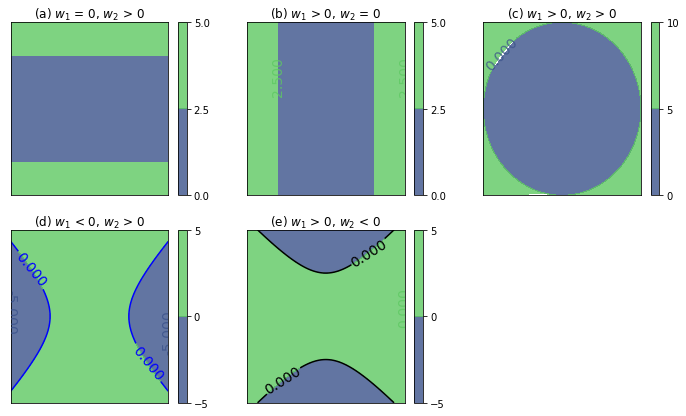

In [8]:
w1 = np.array([ 1, 0, 0, 0, 0.0, 1.0])
w2 = np.array([ 1, 0, 0, 0, 1.0, 0.0])
w3 = np.array([ 1, 0, 0, 0, 1.0, 1.0])
w4 = np.array([ 1, 0, 0, 0,-1.0, 1.0])
w5 = np.array([ 1, 0, 0, 0, 1.0,-1.0])
w_arr = [w1,w2,w3,w4,w5]
w_colors = ['red','orange','green','blue','black']
titles = ['(a) $w_1$ = 0, $w_2$ > 0',
          '(b) $w_1$ > 0, $w_2$ = 0',
          '(c) $w_1$ > 0, $w_2$ > 0',
          '(d) $w_1$ < 0, $w_2$ > 0',
          '(e) $w_1$ > 0, $w_2$ < 0']
plot_id_arr = [ 231, 232, 233, 234, 235 ]
fig = plt.figure(figsize=(12,7))
plot_data_nonlinear(fig,plot_id_arr,w_arr,w_colors,titles)

In the second last example, $\tilde w_1 <0, \tilde w_2 > 0$, (with $x_0 = 1$), we have:

$$\mathbf{x} = \left(1, x_1, x_2\right) \rightarrow \mathbf{z} = \left(1, x_1^2, x_2^2\right)$$

$$g\left(\mathbf{x}\right) = 1 - x_1^2 + x_2^2$$

## 4. Gradient Descent

### 4.1 Gradient Descent Example Using Sympy

This example provides a demonstration of how the package `sympy` can be used to find the gradient of an arbitrary function, and perform gradient descent to the minimum of the function.

Our arbitrary function in this case is:

$$E\left(u,v\right) = \left(ue^v -2ve^{-u}\right)^2$$

In [9]:
var('u v')
expr = (u*exp(v) -2*v*exp(-u))**2
display(Math(latex(expr)))

<IPython.core.display.Math object>

The partial derivative of the function, $E$, with respect to $u$ is:

In [10]:
derivative_u = expr.diff(u)
display(Math(latex(derivative_u)))
display(Math(latex(factor(derivative_u))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The partial derivative of the function, $E$, with respect to $v$ is:

In [11]:
derivative_v = expr.diff(v)
display(Math(latex(derivative_v)))
display(Math(latex(factor(derivative_v))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Next, the functions to implement the gradient descent are implemented as follows.  In the first case, `err_gradient()`, the derivatives are specified in the code.  In the second case, `err_gradient2()`, the derivatives are calculated using `sympy + evalf`:

In [12]:
def err(uv):
    u = uv[0]
    v = uv[1]
    ev = np.exp(v)
    e_u= np.exp(-u)
    return (u*ev - 2.0*v*e_u)**2

def err_gradient(uv):
    u = uv[0]
    v = uv[1]
    ev = np.exp(v)
    e_u= np.exp(-u)
    return np.array([ 2.0*(ev + 2.0*v*e_u)*(u*ev - 2.0*v*e_u),
                      2.0*(u*ev - 2.0*e_u)*(u*ev - 2.0*v*e_u) ])
def err_gradient2(uv):
    du = derivative_u.subs(u,uv[0]).subs(v,uv[1]).evalf()
    dv = derivative_v.subs(u,uv[0]).subs(v,uv[1]).evalf()
    return np.array([ du, dv ], dtype=float)

To follow the gradient to the function minimum, we can either use $\nabla E$ in the gradient descent approach, or we can alternate between the individual derivatives, $\frac{\partial E}{\partial u}$ and $\frac{\partial E}{\partial v}$ in the coordinate descent approach. 

In [13]:
def gradient_descent(x0, err, d_err, eta=0.1):
    x = x0
    for i in range(20):
        e = err(x)
        de = d_err(x)
        print("%2d: x = (%8.5f, %8.5f) | err' = (%8.4f, %8.4f) | err = %.3e" %
              (i,x[0],x[1],de[0],de[1],e))
        if e < 1e-14:
            break
        x = x - eta*de

def coordinate_descent(x0, err, d_err, eta=0.1):
    x = x0
    for i in range(15):
        # Step 1: Move along the u-coordinate
        e = err(x)
        de = d_err(x)
        print("%2d: x = (%8.5f, %8.5f) | err' = (%8.4f, --------) | err = %.3e" %
              (i,x[0],x[1],de[0],e))
        x[0] = x[0] - eta*de[0]
        if e < 1e-14: break
        
        # Step 2: Move along the v-coordinate
        e = err(x)
        de = d_err(x)
        print("%2d: x = (%8.5f, %8.5f) | err' = (--------, %8.4f) | err = %.3e" %
              (i,x[0],x[1],de[1],e))
        x[1] = x[1] - eta*de[1]
        if e < 1e-14: break

In [14]:
x0 = np.array([1.0,1.0])
gradient_descent(x0=x0, err=err, d_err=err_gradient)

 0: x = ( 1.00000,  1.00000) | err' = ( 13.6954,   7.8608) | err = 3.930e+00
 1: x = (-0.36954,  0.21392) | err' = ( -4.0006,   7.2185) | err = 1.160e+00
 2: x = ( 0.03052, -0.50793) | err' = ( -0.7700,  -3.8572) | err = 1.007e+00
 3: x = ( 0.10752, -0.12221) | err' = (  0.4188,  -1.0704) | err = 9.901e-02
 4: x = ( 0.06564, -0.01517) | err' = (  0.1780,  -0.3366) | err = 8.661e-03
 5: x = ( 0.04784,  0.01849) | err' = (  0.0284,  -0.0501) | err = 1.818e-04
 6: x = ( 0.04500,  0.02350) | err' = (  0.0024,  -0.0043) | err = 1.297e-06
 7: x = ( 0.04476,  0.02392) | err' = (  0.0002,  -0.0003) | err = 7.292e-09
 8: x = ( 0.04474,  0.02396) | err' = (  0.0000,  -0.0000) | err = 4.010e-11
 9: x = ( 0.04474,  0.02396) | err' = (  0.0000,  -0.0000) | err = 2.202e-13
10: x = ( 0.04474,  0.02396) | err' = (  0.0000,  -0.0000) | err = 1.209e-15


In [15]:
gradient_descent(x0=x0, err=err, d_err=err_gradient2)

 0: x = ( 1.00000,  1.00000) | err' = ( 13.6954,   7.8608) | err = 3.930e+00
 1: x = (-0.36954,  0.21392) | err' = ( -4.0006,   7.2185) | err = 1.160e+00
 2: x = ( 0.03052, -0.50793) | err' = ( -0.7700,  -3.8572) | err = 1.007e+00
 3: x = ( 0.10752, -0.12221) | err' = (  0.4188,  -1.0704) | err = 9.901e-02
 4: x = ( 0.06564, -0.01517) | err' = (  0.1780,  -0.3366) | err = 8.661e-03
 5: x = ( 0.04784,  0.01849) | err' = (  0.0284,  -0.0501) | err = 1.818e-04
 6: x = ( 0.04500,  0.02350) | err' = (  0.0024,  -0.0043) | err = 1.297e-06
 7: x = ( 0.04476,  0.02392) | err' = (  0.0002,  -0.0003) | err = 7.292e-09
 8: x = ( 0.04474,  0.02396) | err' = (  0.0000,  -0.0000) | err = 4.010e-11
 9: x = ( 0.04474,  0.02396) | err' = (  0.0000,  -0.0000) | err = 2.202e-13
10: x = ( 0.04474,  0.02396) | err' = (  0.0000,  -0.0000) | err = 1.209e-15


Here, we can see that in both approaches of gradient descent above, it takes about 10 iterations to get the error below $10^{-14}$.

For comparison, an attempt to find the roots of the minimum via [`scipy.optimize.minimize`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.minimize.html) was made, but it yielded a different result.  This could be due to the fact that another method was used (in this case, conjugate gradient).  At the moment, `scipy.optimize.minimize`, does not appear to have a gradient descent implementation.

In [16]:
err_fn = lambda x: (x[0]*np.exp([1]) - 2.0*x[1]*np.exp(-x[0]))**2
result = minimize(err_fn, x0=np.array([1.0,1.0]), tol=1e-5, method='CG')
if result.success is True:
    x = result.x
    print("x = {}".format(x))
    print("f = {}".format(result.fun))
    print("evalf = {}".format(expr.subs(u,x[0]).subs(v,x[1]).evalf()))

x = [ 0.49714221  1.11083931]
f = 1.7782471701861512e-17
evalf = 0.0250910775449603


### 4.2 Coordinate Descent

Using the coordinate descent approach, the error minimization takes place more slowly.  Even after 15 iterations, the error remains at only ~0.15, regardless of implementation.

In [17]:
x0 = np.array([1.0,1.0])
coordinate_descent(x0=x0, err=err, d_err=err_gradient)

 0: x = ( 1.00000,  1.00000) | err' = ( 13.6954, --------) | err = 3.930e+00
 0: x = (-0.36954,  1.00000) | err' = (--------,  30.3992) | err = 1.520e+01
 1: x = (-0.36954, -2.03992) | err' = (-67.6202, --------) | err = 3.429e+01
 1: x = ( 6.39247, -2.03992) | err' = (--------,   1.3878) | err = 7.024e-01
 2: x = ( 6.39247, -2.17870) | err' = (  0.1548, --------) | err = 5.341e-01
 2: x = ( 6.37700, -2.17870) | err' = (--------,   1.0477) | err = 5.318e-01
 3: x = ( 6.37700, -2.28347) | err' = (  0.1239, --------) | err = 4.327e-01
 3: x = ( 6.36461, -2.28347) | err' = (--------,   0.8474) | err = 4.311e-01
 4: x = ( 6.36461, -2.36821) | err' = (  0.1033, --------) | err = 3.650e-01
 4: x = ( 6.35428, -2.36821) | err' = (--------,   0.7138) | err = 3.640e-01
 5: x = ( 6.35428, -2.43959) | err' = (  0.0886, --------) | err = 3.165e-01
 5: x = ( 6.34542, -2.43959) | err' = (--------,   0.6178) | err = 3.157e-01
 6: x = ( 6.34542, -2.50138) | err' = (  0.0774, --------) | err = 2.798e-01

In [18]:
x0 = np.array([1.0,1.0])
coordinate_descent(x0=x0, err=err, d_err=err_gradient2)

 0: x = ( 1.00000,  1.00000) | err' = ( 13.6954, --------) | err = 3.930e+00
 0: x = (-0.36954,  1.00000) | err' = (--------,  30.3992) | err = 1.520e+01
 1: x = (-0.36954, -2.03992) | err' = (-67.6202, --------) | err = 3.429e+01
 1: x = ( 6.39247, -2.03992) | err' = (--------,   1.3878) | err = 7.024e-01
 2: x = ( 6.39247, -2.17870) | err' = (  0.1548, --------) | err = 5.341e-01
 2: x = ( 6.37700, -2.17870) | err' = (--------,   1.0477) | err = 5.318e-01
 3: x = ( 6.37700, -2.28347) | err' = (  0.1239, --------) | err = 4.327e-01
 3: x = ( 6.36461, -2.28347) | err' = (--------,   0.8474) | err = 4.311e-01
 4: x = ( 6.36461, -2.36821) | err' = (  0.1033, --------) | err = 3.650e-01
 4: x = ( 6.35428, -2.36821) | err' = (--------,   0.7138) | err = 3.640e-01
 5: x = ( 6.35428, -2.43959) | err' = (  0.0886, --------) | err = 3.165e-01
 5: x = ( 6.34542, -2.43959) | err' = (--------,   0.6178) | err = 3.157e-01
 6: x = ( 6.34542, -2.50138) | err' = (  0.0774, --------) | err = 2.798e-01

## 5. Logistic Regression

### 5.1 Creating a target function

For simplicity, we choose a target function, $f$, to be a 0/1 probability.
For visualization purposes, we choose the domain of interest to be in 2 dimensions, and choose $\mathbf{x}$ to be picked uniformly from the region $\mathcal{X}=\left[-1,1\right] \times \left[-1,1\right]$,
where $\times$ denotes the [Cartesian Product](https://en.wikipedia.org/wiki/Cartesian_product).

A random line is created, and to ensure that it falls within the region of interest, it is created from two random points, $(x_0,y_0)$ and $(x_1,y_1)$ which are generated within $\mathcal{X}$.  The equation for this line in *slope-intercept* form and in the *hypothesis / weights* can be shown to be:

**Slope-Intercept Form**

$$m = - \frac{w_1}{w_2}, c = - \frac{w_0}{w_2}$$

**Hypothesis Weights Form**

$$\mathbf{w} = \left(-c,-m,1\right)$$

In [19]:
def generate_data(n,seed=None):
    if seed is not None:
        np.random.seed(seed)
    x0 = np.ones(n)
    x1 = np.random.uniform(low=-1,high=1,size=(2,n))
    return np.vstack((x0,x1)).T

In [20]:
def get_random_line(seed=None):
    X = generate_data(2,seed=seed)
    x = X[:,1]
    y = X[:,2]
    m = (y[1]-y[0])/(x[1]-x[0])
    c = y[0] - m*x[0]
    return np.array([-c,-m,1])

def draw_line(ax,w,marker='g--',label=None):
    m = -w[1]/w[2]
    c = -w[0]/w[2]
    x = np.linspace(-1,1,20)
    y = m*x + c
    if label is None:
        ax.plot(x,y,marker)
    else:
        ax.plot(x,y,marker,label=label)
    
def get_hypothesis(X,w):
    h=np.dot(X,w)
    return np.sign(h).astype(int)

### 5.2 Plotting the Data

In [21]:
def plot_data(fig,plot_id,X,y=None,w_arr=None,my_x=None,title=None):
    ax = fig.add_subplot(plot_id)
    if y is None:
        ax.plot(X[:,1],X[:,2],'gx')
    else:
        ax.plot(X[y > 0,1],X[y > 0,2],'b+',label='Positive (+)')
        ax.plot(X[y < 0,1],X[y < 0,2],'ro',label='Negative (-)')
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.grid(True)
    if w_arr is not None:
        if isinstance(w_arr,list) is not True:
            w_arr=[w_arr]
        for i,w in enumerate(w_arr):
            if i==0:
                draw_line(ax,w,'g-',label='Theoretical')
            else:
                draw_line(ax,w,'g--')
    if my_x is not None:
        ax.plot([my_x[0]],[my_x[1]],'kx',markersize=10)
    if title is not None:
        ax.set_title(title)
    ax.legend(loc='best',frameon=True)

In [22]:
def create_dataset(N,make_plot=True,seed=None):
    X = generate_data(N,seed=seed)
    w_theoretical = get_random_line()
    y = get_hypothesis(X,w_theoretical)
    if make_plot is True:
        fig = plt.figure(figsize=(7,5))
        plot_data(fig,111,X,y,w_theoretical,title="Initial Dataset")
    return X,y,w_theoretical

We choose 100 training points at random from $\mathcal{X}$ and record the outputs, $y_n$, for each of the points, $\mathbf{x_n}$.

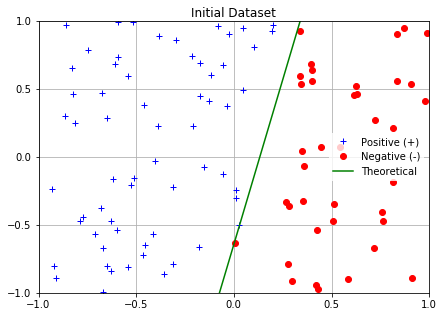

In [23]:
N = 100
X,y,w_theoretical = create_dataset(N=N,make_plot=True,seed=127)

### 5.3 Gradient Descent

The gradient descent algorithm adjust the weights in the direction of the 'steepest descent' ($\nabla E_{in}$), with the adjustment of a learning rate, $\eta$:

$$\mathbf{w}(t+1) = \mathbf{w}(t) - \eta\nabla E_{in}$$

We thus need to know the gradient of the error measure with respect to the weights, i.e.:

$$\nabla E_{in}\left(\mathbf{w}\right) = -\frac{1}{N}\sum\limits_{n=1}^N \frac{y_n\mathbf{x_N}}{1 + \exp\left(y_n \mathbf{w^T}(t)\mathbf{x_n}\right)}$$

$$E_{in}\left(\mathbf{w}\right) = \frac{1}{N}\sum\limits_{n=1}^N \ln\left[1 + \exp\left(-y_n \mathbf{w^T x_n}\right)\right]$$

In [24]:
w = w_theoretical
def cross_entropy(y_i,w,x):
    return np.log(1 + np.exp(-y_i*np.dot(x,w)))
def gradient(y_i,w,x):
    return -y_i*x/(1+np.exp(y_i*np.dot(x,w)))
assert np.allclose(cross_entropy(y[0],w,X[0,:]),np.log(1 + np.exp(-y[0]*np.dot(X[0,:],w))))
assert np.allclose(gradient(y[0],w,X[0,:]),-y[0]*X[0,:]/(1+np.exp(y[0]*np.dot(X[0,:],w))))

In [25]:
np.mean(cross_entropy(y,w,X))

0.15242626832575448

In [26]:
np.set_printoptions(precision=4)
assert np.linalg.norm(np.array([1.0, 2.0, 3.0])) == np.sqrt(1**2 + 2**2 + 3**2)

In [27]:
def run_simulation(N=100,eta=0.01,make_plot=None,w0 = np.array([0,0,0],dtype=float)):
    X = generate_data(N)
    w_theoretical = get_random_line()
    y = get_hypothesis(X,w_theoretical)

    w_arr = []
    w_arr2= []
    e_arr = []
    w = w0
    h = get_hypothesis(X,w)
    assert y.dtype == h.dtype
    for t_epoch in range(1000):
        w_epoch = w
        for i,p in enumerate(permutation(N)):
            grad = gradient(y[p],w,X[p,:])
            w = w - eta*grad;
            w_arr2.append(w)

        #Estimate out-of-sample error by re-generating data
        X_out = generate_data(N)
        h = get_hypothesis(X_out,w_theoretical)
        misclassified = np.mean(h != y)
        #E_out = np.mean(cross_entropy(y,w,X))
        E_out = np.mean(cross_entropy(h,w,X_out))
        delta_w = np.linalg.norm(w - w_epoch)
        w_arr.append(w)
        e_arr.append(E_out)
        #if t_epoch % 20 == 0:
        #    print("epoch{:4}: miss={}, delta_w={}, E_out={}, w={}".format(
        #          t_epoch, misclassified, np.round(delta_w,5), E_out, w))
        if delta_w < 0.01: break
    print("Epochs = {}, E_out = {}, w = {}".format(t_epoch, E_out, w))
    if make_plot is not None:
        fig = plt.figure(figsize=(7,5))
        plot_data(fig,111,X,y,[w_theoretical,w],title="Converged")
    return e_arr, np.array(w_arr), X, y, np.array(w_arr2)

Due to the randomness of starting with different target functions each time, we run stochastic gradient descent multiple times and consider the statistics in terms of the average number of epochs and the average out-of-sample errors.

In [28]:
t_arr = []
e_arr = []
w_arr = []
for n in range(50):
    e, w, _, _, _ = run_simulation()
    t_arr.append(len(e)-1)  #Should I subtract 1 here?
    e_arr.append(e[-1])
    w_arr.append(w[-1])

Epochs = 344, E_out = 0.1145102478546653, w = [-4.3349 -6.8128  3.151 ]
Epochs = 330, E_out = 0.13254923381857528, w = [ 3.9176  7.7578  3.0019]
Epochs = 338, E_out = 0.12272718416074929, w = [-5.1854  5.7707 -0.0663]
Epochs = 362, E_out = 0.11358961920713569, w = [-5.1431  1.1128  7.6227]
Epochs = 355, E_out = 0.08452200240499405, w = [-3.4195  7.4099  4.1785]
Epochs = 387, E_out = 0.10453583621865964, w = [ 1.4044 -7.1103  6.8903]
Epochs = 382, E_out = 0.11095706431956907, w = [ 1.2906 -6.6268  7.327 ]
Epochs = 375, E_out = 0.11401376588425498, w = [ 4.3071  8.4367  1.3905]
Epochs = 313, E_out = 0.08906826626000988, w = [-4.6285  5.0157  4.3839]
Epochs = 319, E_out = 0.09907279197577364, w = [ 1.8946  7.248   4.4978]
Epochs = 331, E_out = 0.11951194996454045, w = [-2.1788  7.0753  5.1223]
Epochs = 345, E_out = 0.08534027589824467, w = [ 4.5074  2.043   6.8368]
Epochs = 353, E_out = 0.09919776381452064, w = [ 2.6006  8.8545  2.8099]
Epochs = 386, E_out = 0.10680017454642046, w = [ 2.3

The average out of sample error and the average number of epochs from the multiple runs above are:

In [29]:
print("<E_out> = {}".format(np.mean(e_arr)))
print("<Epochs> = {}".format(np.mean(t_arr)))

<E_out> = 0.10325358016261309
<Epochs> = 342.26


### 5.4 Gradient Descent Visualization

In [30]:
def normalize_weights(w_arr):
    # You can't normalize the weights as this changes the cross entropy.
    w_arr[:,1] = w_arr[:,1] / w_arr[:,0]
    w_arr[:,2] = w_arr[:,2] / w_arr[:,0]
    w_arr[:,0] = 1.0
    return w_arr

In [31]:
def calculate_J(w0,w1,w2,X,y):
    J = np.zeros((w1.size,w2.size))
    for j in range(w1.size):
        for i in range(w2.size):
            W = np.array([w0, w1[j], w2[i]])
            J[i,j] = np.mean(cross_entropy(y,W,X))
    return J

def get_WJ(w_arr,X,y,n=100):
    w_arr = np.array(w_arr)

    w1_min = np.min(w_arr[:,1])
    w2_min = np.min(w_arr[:,2])
    w1_max = np.max(w_arr[:,1])
    w2_max = np.max(w_arr[:,2])
    sp = 10.0

    w0 = w_arr[-1,0]  # take a 2D slice through the final value of w_0 in the 3D space [w0,w1,w2]
    w1 = np.linspace(w1_min-sp,w1_max+sp,n)
    w2 = np.linspace(w2_min-sp,w2_max+sp,n)
    W1, W2 = np.meshgrid(w1,w2)
    J = calculate_J(w0,w1,w2,X,y)
    return w_arr,w1,w2,W1,W2,J

In [32]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
def visualise_SGD_3D(e_arr,w_arr,w_arr2,X,y,epoch_interval,elevation=30,azimuth=75):
    w_arr,w1,w2,W1,W2,J = get_WJ(w_arr,X,y)
    w0 = w_arr[-1,0]  # take a 2D slice through the final value of w_0 in the 3D space [w0,w1,w2]
    z_arr = [ np.mean(cross_entropy(y,[w0,w_i[1],w_i[2]],X)) for w_i in w_arr ]
    z_arr2 = [ np.mean(cross_entropy(y,[w0,w_i[1],w_i[2]],X)) for w_i in w_arr2 ]

    fig = plt.figure(figsize=(14,10))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(W1,W2,J, rstride=10, cstride=10, cmap=cm.coolwarm,
           linewidth=0.3, antialiased=True, alpha=0.9) #, zorder=3)
    ax.set_xlabel(r'$w_1$', fontsize=18)
    ax.set_ylabel(r'$w_2$', fontsize=18)
    ax.set_zlabel(r'$E_{in}$', fontsize=18)
    ax.plot(w_arr[:,1],w_arr[:,2],z_arr,'k-',lw=0.8,label="Stochastic Gradient Descent (SGD)")
    ax.plot(w_arr2[:,1],w_arr2[:,2],z_arr2,'k-',lw=1.8,alpha=0.3,label="SGD within epochs")
    ax.plot(w_arr[::epoch_interval,1],w_arr[::epoch_interval,2],z_arr[::epoch_interval],
            'ko',markersize=7,label=r"Intervals of $n$ Epochs")
    ax.scatter([w_arr[-1,1]],[w_arr[-1,2]],[z_arr[-1]], c='r', s=250, marker='x', lw=3);
    #fig.colorbar(surf, shrink=0.5, aspect=12)
    ax.legend(loc='best',frameon=False)
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    ax.axes.zaxis.set_ticklabels([])
    ax.view_init(elev=elevation, azim=azimuth)

def visualise_SGD_contour(e_arr,w_arr,w_arr2,X,y,epoch_interval):
    w_arr,w1,w2,W1,W2,J = get_WJ(w_arr,X,y)

    fig = plt.figure(figsize=(12,8))
    ax = fig.gca()
    CS = plt.contour(W1,W2,J,20)
    #plt.clabel(CS, inline=1, fontsize=10)
    ax.set_xlabel(r'$w_1$', fontsize=18)
    ax.set_ylabel(r'$w_2$', fontsize=18)
    ax.plot(w_arr[:,1],w_arr[:,2],'k-',lw=0.8,label="Stochastic Gradient Descent (SGD)")
    ax.plot(w_arr2[:,1],w_arr2[:,2],'k-',lw=1.8,alpha=0.3,label="SGD within epochs")
    ax.plot(w_arr[::epoch_interval,1],w_arr[::epoch_interval,2],
            'ko',markersize=7,label=r"Intervals of $n$ Epochs")
    ax.scatter([w_arr[-1,1]],[w_arr[-1,2]], c='r', s=150, marker='x', lw=3);
    ax.legend(loc='best',frameon=False)
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    plt.title(r'$E_{in}$', fontsize=16);

In [33]:
def plot_epochs(e_arr,w_arr,X,y,epoch_interval):
    w_arr,w1,w2,W1,W2,J = get_WJ(w_arr,X,y)
    E_in = [ np.mean(cross_entropy(y,w_i,X)) for w_i in w_arr ]
    epoch = np.array(range(len(e_arr)))

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(211)
    ax.set_ylabel(r'Error', fontsize=16)
    ax.plot(epoch,e_arr,c='g',markersize=1,marker='+',lw=1,alpha=0.8,label=r'$E_{out}$')
    #ax.scatter(epoch[::epoch_interval],e_arr[::epoch_interval],c='g',s=20,marker='o',lw=3,alpha=0.8)
    ax.plot(epoch,E_in,c='k',linestyle='--',label=r'$E_{in}$')
    ax.legend(loc='best',frameon=False, fontsize=16)
    ax.set_title('"Cross Entropy" Error', fontsize=16);
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    ax.grid(True)

    ax = fig.add_subplot(212)
    ax.set_xlabel(r'Epoch', fontsize=16)
    ax.set_ylabel(r'Error', fontsize=16)
    ax.loglog(epoch,e_arr,c='g',markersize=1,marker='+',lw=1,alpha=0.8,label=r'$E_{out}$')
    ax.loglog(epoch,E_in,c='k',linestyle='--',label=r'$E_{in}$')
    #ax.loglog(epoch[::epoch_interval],e_arr[::epoch_interval],c='g',markersize=8,marker='o',lw=3,alpha=0.8,ls='None')
    ax.legend(loc='best',frameon=False, fontsize=16)
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    ax.grid(True)

In [34]:
np.random.seed(12345)
e_arr, w_arr, X, y, w_arr2 = run_simulation(N=15,eta=0.8,w0=np.array([2.0, 10.0, -20.0]))

Epochs = 751, E_out = 0.00495140131231788, w = [  4.8336  21.6983  15.9885]


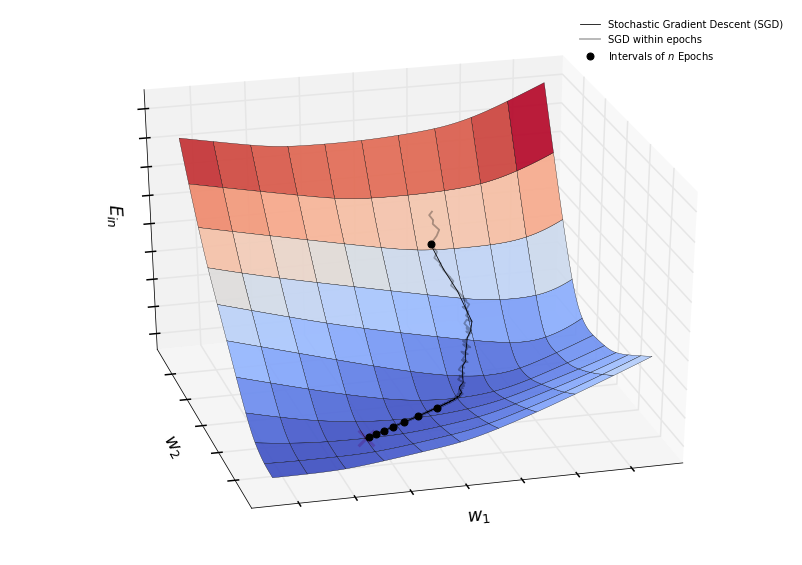

In [35]:
visualise_SGD_3D(e_arr,w_arr,w_arr2,X,y,epoch_interval=100)

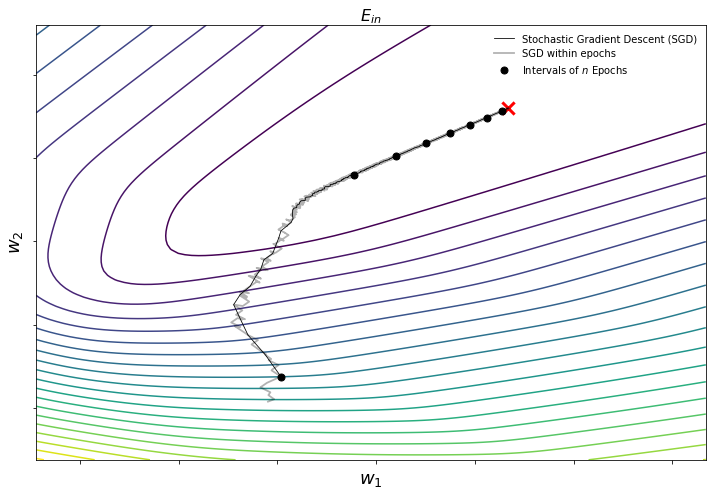

In [36]:
visualise_SGD_contour(e_arr,w_arr,w_arr2,X,y,epoch_interval=100)

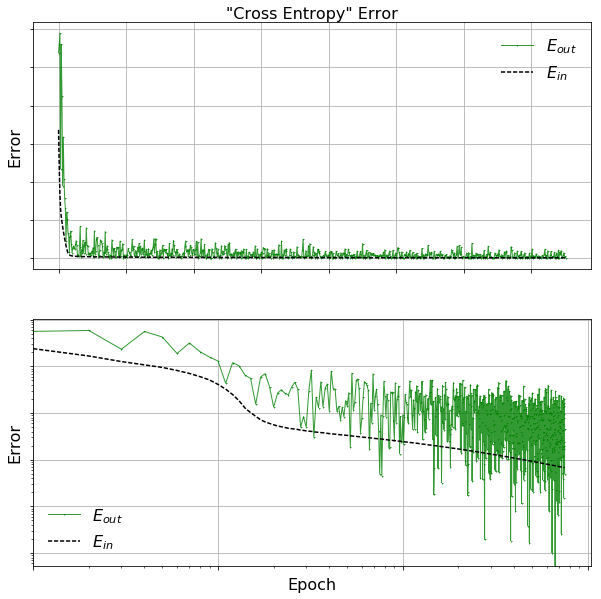

In [37]:
plot_epochs(e_arr,w_arr,X,y,epoch_interval=100)

### 5.5 Stochastic Gradient Descent vs Perceptron Learning Algorithm

"Consider that you are picking a point at random out of the $N$ points. In PLA, you see if it is misclassified then update using the PLA rule if it is and not update if it isn't. In SGD, you take the gradient of the error on that point w.r.t. $\mathbf{w}$ and update accordingly. Which of the 5 error functions would make these equivalent?

- **(a)**: $e_n\left(\mathbf{w}\right) = \exp\left(-y_n \mathbf{w^T x_n}\right)$
- **(b)**: $e_n\left(\mathbf{w}\right) = -y_n \mathbf{w^T x_n}$
- **(c)**: $e_n\left(\mathbf{w}\right) = \left(y_n - \mathbf{w^T x_n}\right)^2$
- **(d)**: $e_n\left(\mathbf{w}\right) = \ln\left[1 + \exp\left(-y_n \mathbf{w^T x_n}\right)\right]$
- **(e)**: $e_n\left(\mathbf{w}\right) = -\min\left(0, y_n \mathbf{w^T x_n}\right)$

Answer: **(e)**

Notes: an attempt to evaluate the gradients of the above functions using sympy was carried out as follows (the final expression, which contains the function `min` was excluded):

In [38]:
var('y_n w_i x_n')
expr = exp(-y_n * w_i * x_n)
d_expr = expr.diff(w_i)
display(Math(latex(d_expr)))

expr = -y_n * w_i * x_n
d_expr = expr.diff(w_i)
display(Math(latex(d_expr)))

expr = (y_n - w_i * x_n)**2
d_expr = simplify(expr.diff(w_i))
display(Math(latex(d_expr)))

expr = log(1+exp(-y_n * w_i * x_n))
d_expr = simplify(expr.diff(w_i))
display(Math(latex(d_expr)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [39]:
w_final = np.array(w_arr)[-1,:]
e_a = np.mean(np.exp(-y*np.dot(X,w_final)))
e_b = np.mean(-y*np.dot(X,w_final))
e_c = np.mean((y - np.dot(X,w_final))**2)
e_d = np.mean(np.log(1 + np.exp(-y*np.dot(X,w_final))))
e_e = -y*np.dot(X,w_final); e_e[e_e > 0] = 0; e_e = np.mean(e_e)
print("(a) e_n(w) = {}".format(e_a))
print("(b) e_n(w) = {}".format(e_b))
print("(c) e_n(w) = {}".format(e_c))
print("(d) e_n(w) = {}".format(e_d))
print("(e) e_n(w) = {}".format(e_e))

(a) e_n(w) = 0.006921150896126407
(b) e_n(w) = -15.160717353544413
(c) e_n(w) = 314.2802497501979
(d) e_n(w) = 0.006754859029354315
(e) e_n(w) = -15.160717353544413


An attempt was also made to visualize the gradient descent algorithm when performed on the various error functions.

In [40]:
def my_err_fn(y,W,X):
    #e = np.exp(-y*np.dot(X,W))              # e_a
    #e = -y*np.dot(X,W)                      # e_b
    #e = (y - np.dot(X,W))**2                # e_c
    e = np.log(1 + np.exp(-y*np.dot(X,W)))   # e_d
    #e = -y*np.dot(X,W); e[e > 0] = 0        # e_e
    return np.mean(e)

def calculate_J(w0,w1,w2,X,y,my_err_fn):
    J = np.zeros((w1.size,w2.size))
    for j in range(w1.size):
        for i in range(w2.size):
            W = np.array([w0, w1[j], w2[i]])
            J[i,j] = my_err_fn(y,W,X)
    return J

def get_WJ(w_arr,X,y,my_err_fn,n=100):
    w_arr = np.array(w_arr)
    w1_min = np.min(w_arr[:,1])
    w2_min = np.min(w_arr[:,2])
    w1_max = np.max(w_arr[:,1])
    w2_max = np.max(w_arr[:,2])
    sp = 10.0

    w0 = w_arr[-1,0]  # take a 2D slice through the final value of w_0 in the 3D space [w0,w1,w2]
    w1 = np.linspace(w1_min-sp,w1_max+sp,n)
    w2 = np.linspace(w2_min-sp,w2_max+sp,n)
    W1, W2 = np.meshgrid(w1,w2)
    J = calculate_J(w0,w1,w2,X,y,my_err_fn)
    return w_arr,w1,w2,W1,W2,J

def visualise_SGD_contour2(e_arr,w_arr,X,y,my_err_fn):
    w_arr,w1,w2,W1,W2,J = get_WJ(w_arr,X,y,my_err_fn)

    fig = plt.figure(figsize=(10,7))
    ax = fig.gca()
    CS = plt.contour(W1,W2,J,20)
    plt.clabel(CS, inline=1, fontsize=10)
    ax.set_xlabel(r'$w_1$', fontsize=18)
    ax.set_ylabel(r'$w_2$', fontsize=18)
    ax.plot(w_arr[:,1],w_arr[:,2],'k-',label="Gradient Descent")
    ax.plot(w_arr[::100,1],w_arr[::100,2],'ko',markersize=7,label=r"Intervals of $n$ Epochs")
    ax.scatter([w_arr[-1,1]],[w_arr[-1,2]], c='r', s=150, marker='x', lw=3);
    ax.legend(loc='best',frameon=False)
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    plt.title(r'$E_{in}$', fontsize=16)

Epochs = 999, E_out = 0.021538646634195316, w = [-17.1644  39.6682  24.2869]


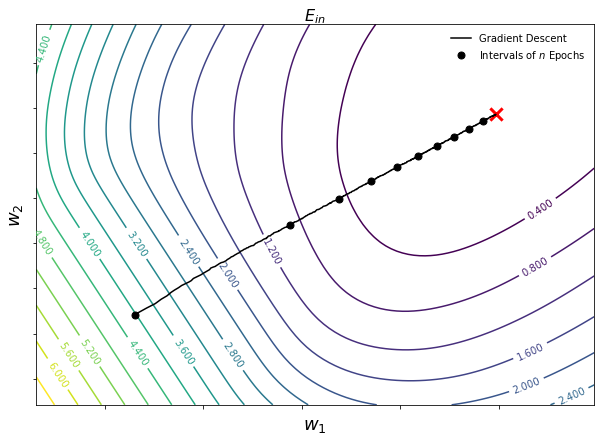

In [41]:
np.random.seed(12345)
e_arr, w_arr, X, y, w_arr2 = run_simulation(N=300,eta=0.15)
visualise_SGD_contour2(e_arr,w_arr,X,y,my_err_fn)